In [2]:
from itertools import combinations
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import trading as trd

In [6]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [7]:
NUM_STOCKS = 3
STOCK_DATA_LOC = join('..', 'data')
stock_files = np.array(glob.glob(join(STOCK_DATA_LOC, '*.csv')))

In [10]:
def cust_plt(ax, data, label='', **kwargs):
    ax.plot_date(data.index, data, ls='solid', marker='', label=label, **kwargs)

In [12]:
p = np.random.permutation(range(len(stock_files)))
stock_files = stock_files[p[0:NUM_STOCKS]]

stock_files

array(['..\\data\\TRIP.csv', '..\\data\\X.csv', '..\\data\\TXT.csv'], 
      dtype='<U16')

In [1]:
combinations(tickers.keys(), 2)

NameError: name 'combinations' is not defined

In [13]:
tickers = dict()

for f in stock_files:
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    tickers[s] = c

In [15]:
class PortfolioRange:
    def __init__(self, A, B, hist_a, hist_b):
        self.A = A
        self.B = B
        self.hist_a = hist_a
        self.hist_b = hist_b

In [16]:
port_ranges = []
for t in range(num_periods):
    start = periods[t][0]
    end = periods[t][1]
    for a, b in combinations(tickers.keys(), 2):
        sa = tickers[a]
        sb = tickers[b]
        
        ia = sa.index[(sa.index >= start) & (sa.index <= end)]
        ib = sa.index[(sb.index >= start) & (sb.index <= end)]
        
        if ia.size != ib.size or (ia != ib).any():
            continue
        
        port_ranges.append(PortfolioRange(a, b, sa[ia], sb[ib]))

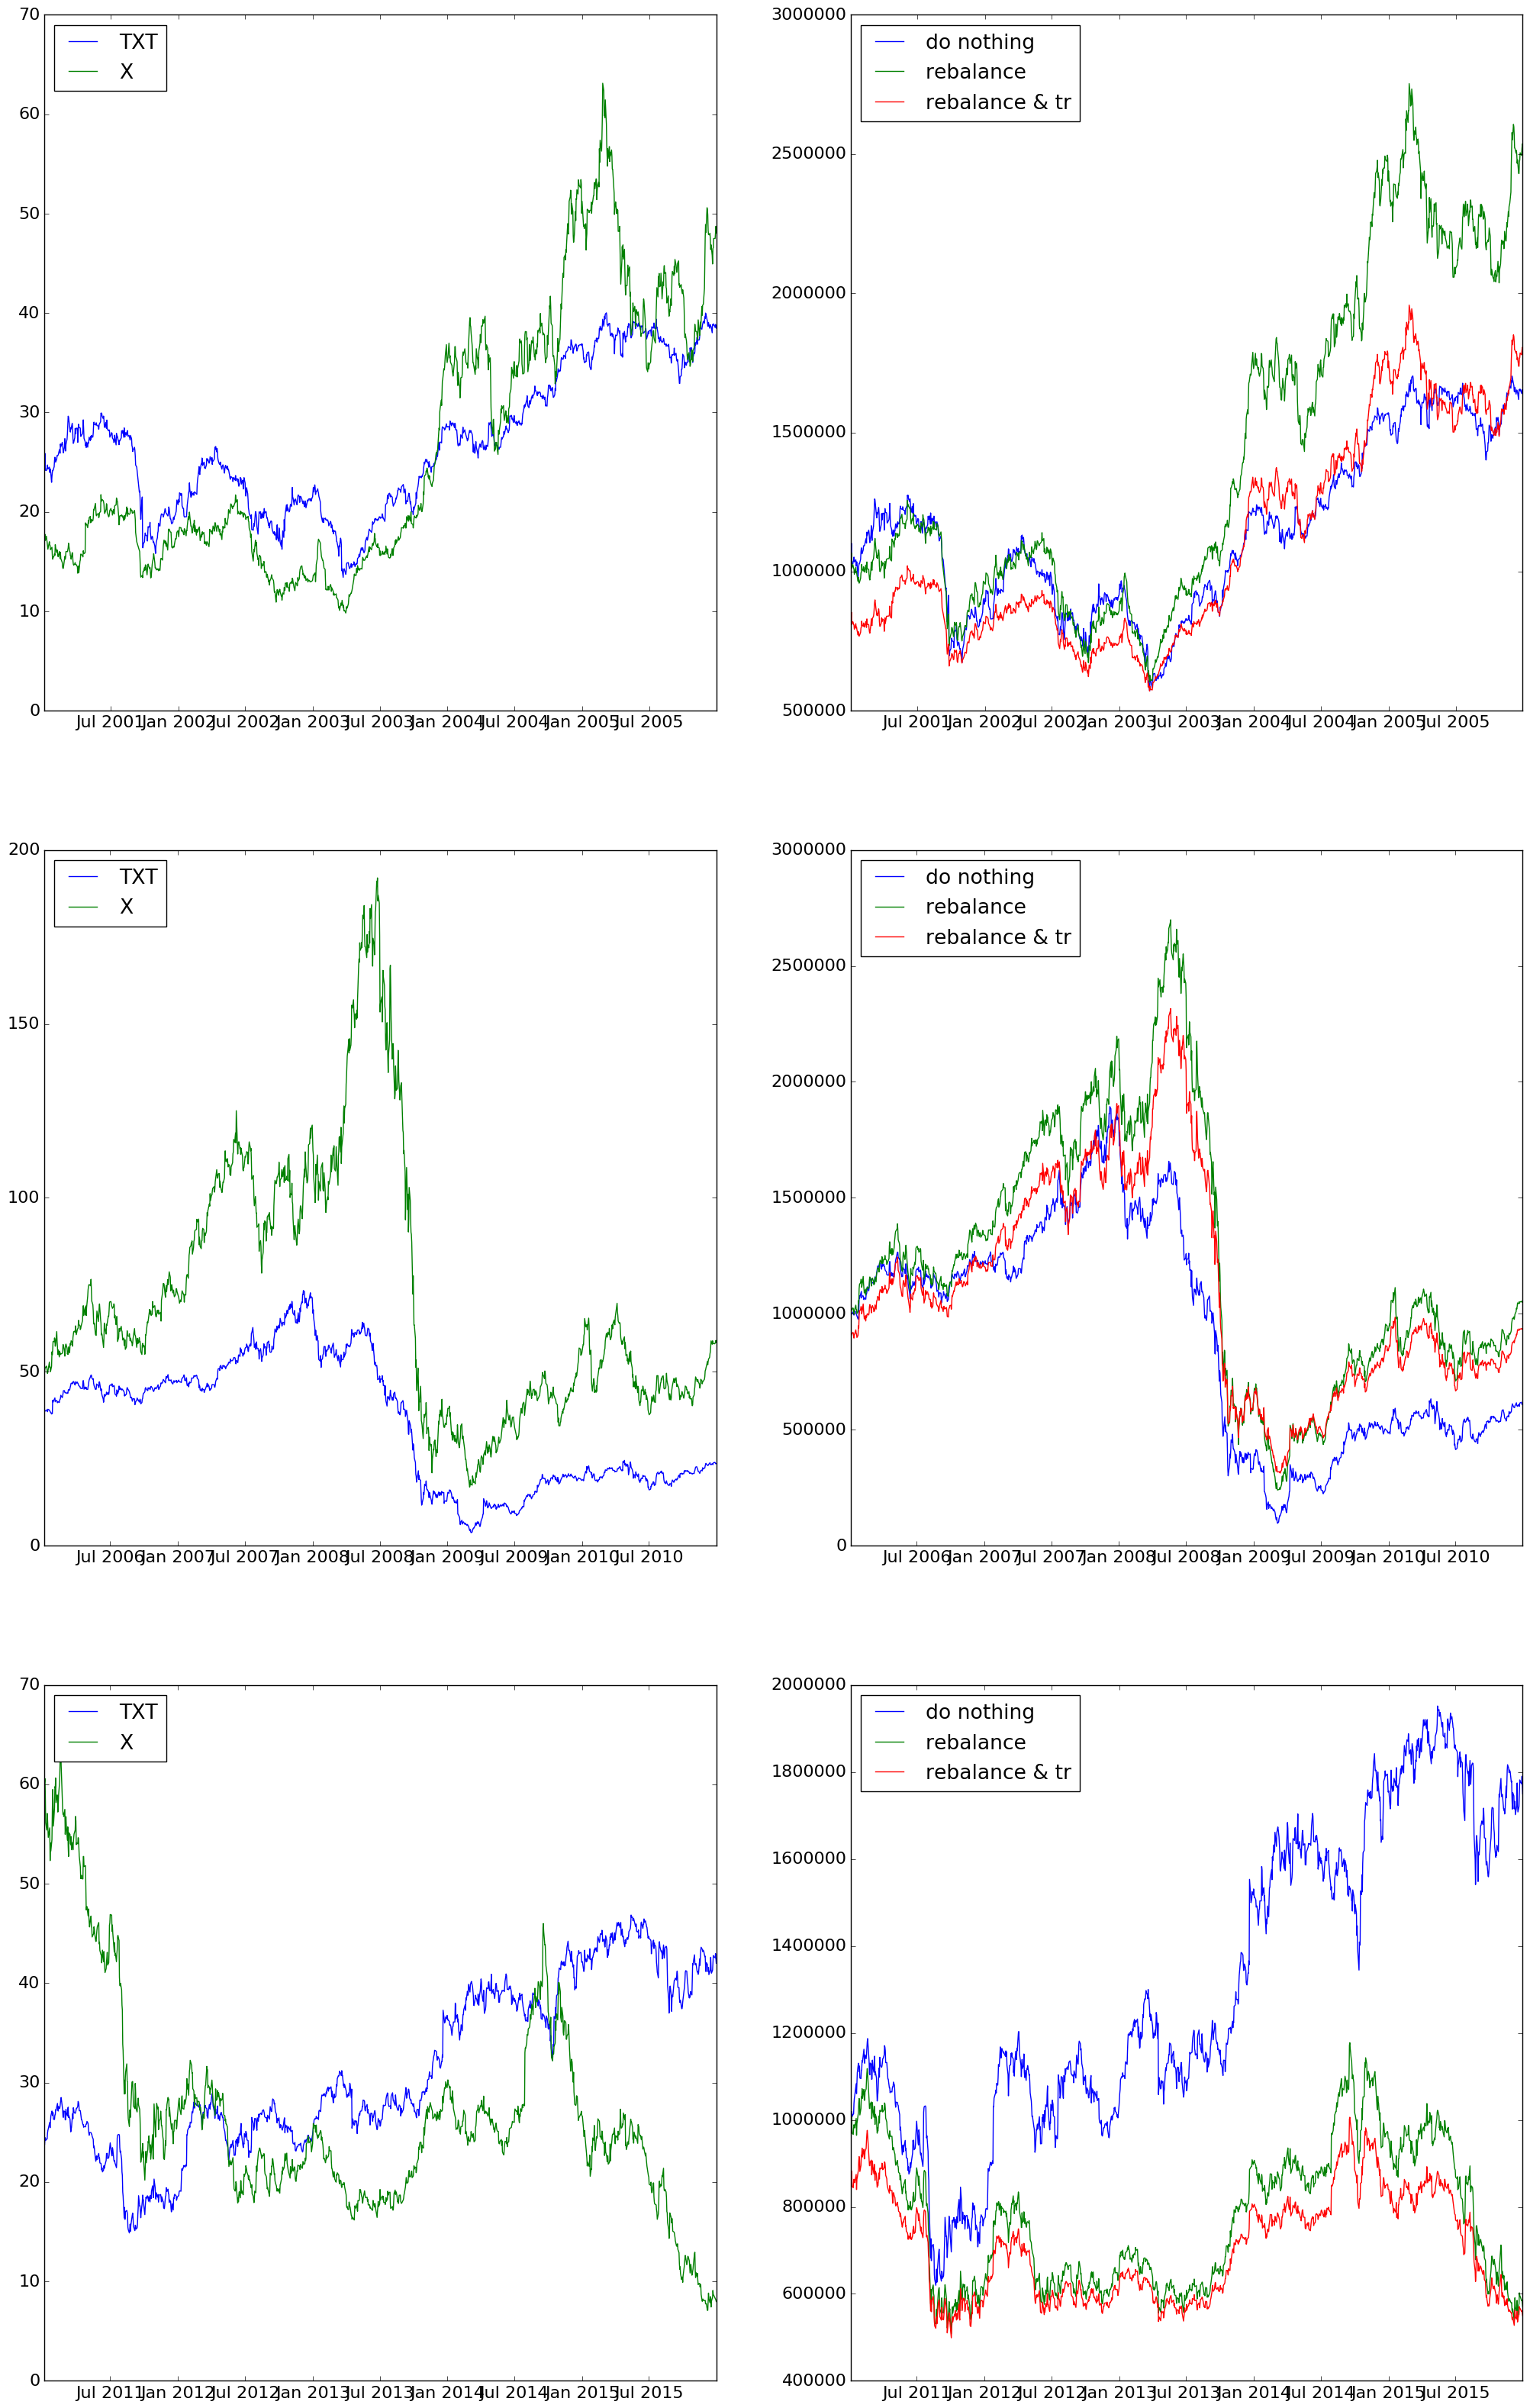

In [18]:
trans_cost = 5

n = len(port_ranges)
matplotlib.rc('font', size=16)
f = plt.figure(figsize=(25, 40))

for i, pr in enumerate(port_ranges):
    stock_a_name = pr.A
    stock_b_name = pr.B
    stock_a = pr.hist_a
    stock_b = pr.hist_b
    
    do_nothing = trd.do_nothing_benchmark(stock_a, stock_a)
    rebal = trd.rebalance_benchmark(stock_a, stock_b, rebalance_period=80)
    rebal_tr = trd.rebalance_benchmark(stock_a, stock_b, rebalance_period=80, trans_cost=trans_cost)
    
    ax = plt.subplot(n, 2, 2*i + 1)
    cust_plt(ax, stock_a, stock_a_name)
    cust_plt(ax, stock_b, stock_b_name)
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
    ax = plt.subplot(n, 2, 2*i + 2 )
    cust_plt(ax, do_nothing.total, 'do nothing')
    cust_plt(ax, rebal.total, 'rebalance ')
    cust_plt(ax, rebal_tr.total, 'rebalance & tr')
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    